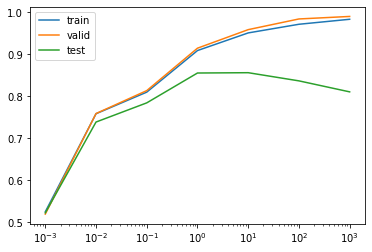

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

def seikairitu(c,c_s,t_s,v_s,te_s):
    LR=LogisticRegression(random_state=100,max_iter=50000,C=c)
    df_train=pd.read_table("train.txt",header=None,names=["CATEGORY","TITLE"])
    df_valid=pd.read_table("valid.txt",header=None,names=["CATEGORY","TITLE"])
    df_test=pd.read_table("test.txt",header=None,names=["CATEGORY","TITLE"])
    X_train=pd.read_table("X_train.txt")
    X_valid=pd.read_table("X_valid.txt")
    X_test=pd.read_table("X_test.txt")
    LR.fit(X_train, df_train["CATEGORY"])
    
    #58
    c_s.append(c)
    t_s.append(accuracy_score(df_train["CATEGORY"],LR.predict(X_train)))
    v_s.append(accuracy_score(df_valid["CATEGORY"],LR.predict(X_valid)))
    te_s.append(accuracy_score(df_test["CATEGORY"],LR.predict(X_test)))
    
    return c_s,t_s,v_s,te_s

c=[]
train_s=[]
valid_s=[]
test_s=[]
for num in range(-3,4):
    seikairitu(10**(num),c,train_s,valid_s,test_s)
plt.plot(c,train_s,label="train")
plt.plot(c,valid_s,label="valid")
plt.plot(c,test_s,label="test")
plt.xscale("log")
plt.legend()